## Initial Setup and Library Imports

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import os
from tqdm import tqdm
import numpy as np
from lib_file import lib_path
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = "downloaded_data"

In [3]:
# !pip install pyarrow

## Loading and Merging Data from Parquet Files

In [4]:
train_data = []
test_data = []

for filename in tqdm(os.listdir(data_dir)):
    status = filename.split("-")[1]
    status = status.split(".")[0]

    filepath = os.path.join(data_dir, filename)
    data = pd.read_parquet(filepath, engine='pyarrow')
    
    if status == 'training':
        train_data.append(data)
        del data
    elif status == 'testing':
        test_data.append(data)
        del data
    else:
        print(filepath)

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 52.48it/s]


In [5]:
len(train_data)

7

In [6]:
len(test_data)

10

In [7]:
train_df = pd.concat(objs=train_data, ignore_index=True)
train_df.shape

(125170, 78)

In [8]:
test_df = pd.concat(objs=test_data, ignore_index=True)
test_df.shape

(306201, 78)

In [9]:
train_df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,17,49,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,9.346939e+06,4.081633e+04,49.0,0.0,49.0,49.0,49.0,49.0,0.0,49.0,49.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,16,0,4.081633e+04,0.0,229.0,229.0,229.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,343.5,229.0,0.0,0,0,0,0,0,0,2,458,0,0,-1,-1,1,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NetBIOS
1,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,2960,0,2.000000e+06,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LDAP
2,17,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,4.580000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,28,0,2.000000e+06,0.0,229.0,229.0,229.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,343.5,229.0,0.0,0,0,0,0,0,0,2,458,0,0,-1,-1,1,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NetBIOS
3,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,28,0,2.000000e+06,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LDAP
4,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,64,0,2.000000e+06,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LDAP


In [10]:
test_df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,17,48,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,6.133333e+07,4.166667e+04,48.0,0.0,48.0,48.0,48.0,48.0,0.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,4.166667e+04,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
1,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,1.472000e+09,1.000000e+06,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-2,0,1.000000e+06,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
2,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-2,0,2.000000e+06,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
3,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,2960,0,2.000000e+06,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
4,17,1,2,0,2896.0,0.0,1448.0,1448.0,1448.0,0.0,0.0,0.0,0.0,0.0,2.896000e+09,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2.000000e+06,0.0,1448.0,1448.0,1448.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2172.0,1448.0,0.0,0,0,0,0,0,0,2,2896,0,0,-1,-1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS


In [11]:
train_df.to_parquet("input/train_data.parquet", index=False, engine='pyarrow')

In [12]:
test_df.to_parquet("input/test_data.parquet", index=False, engine='pyarrow')

In [13]:
# Load the parquet file
file_path_1 = 'input/train_data.parquet'
df1 = pd.read_parquet(file_path_1)

file_path_2 = 'input/test_data.parquet'
df2 = pd.read_parquet(file_path_2)

In [14]:
# Concatenate the five DataFrames into one
df = pd.concat([df1, df2], ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
df.to_parquet('dataset/sampled_dataset.parquet', index=False)

print('Files concatenated successfully into "df"!')

Files concatenated successfully into "df"!


In [15]:
df.shape

(431371, 78)

In [16]:
df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,17,49,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,9.346939e+06,4.081633e+04,49.0,0.0,49.0,49.0,49.0,49.0,0.0,49.0,49.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,16,0,4.081633e+04,0.0,229.0,229.0,229.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,343.5,229.0,0.0,0,0,0,0,0,0,2,458,0,0,-1,-1,1,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NetBIOS
1,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,2960,0,2.000000e+06,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LDAP
2,17,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,4.580000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,28,0,2.000000e+06,0.0,229.0,229.0,229.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,343.5,229.0,0.0,0,0,0,0,0,0,2,458,0,0,-1,-1,1,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NetBIOS
3,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,28,0,2.000000e+06,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LDAP
4,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,64,0,2.000000e+06,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LDAP


## Analyzing and Visualizing the Label Column

In [17]:
# Calculate the count of each unique value in the 'Label' column
label_counts = df['Label'].value_counts()

print("Count of each unique value in the 'Label' column:")
print(label_counts)

Count of each unique value in the 'Label' column:
DrDoS_NTP        121368
TFTP              98917
Benign            97831
Syn               49373
UDP               18090
DrDoS_UDP         10420
UDP-lag            8872
MSSQL              8523
DrDoS_MSSQL        6212
DrDoS_DNS          3669
DrDoS_SNMP         2717
LDAP               1906
DrDoS_LDAP         1440
Portmap             685
NetBIOS             644
DrDoS_NetBIOS       598
UDPLag               55
WebDDoS              51
Name: Label, dtype: int64


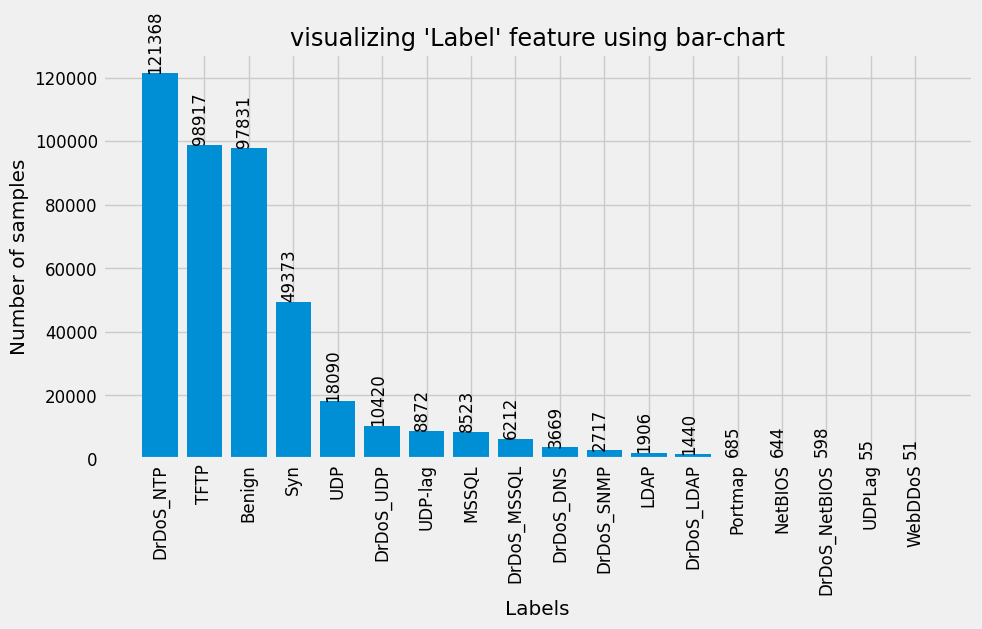

In [18]:
chart_df = dict(df['Label'].value_counts())
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(10,5))
    plt.rcParams['font.size'] = 12
    barchart_object = plt.bar(
        x=list(chart_df.keys()),
        height=list(chart_df.values())
    )
    plt.title(label="visualizing 'Label' feature using bar-chart")
    plt.xlabel(xlabel='Labels')
    plt.ylabel(ylabel='Number of samples')
    
    plt.xticks(rotation=90)
    
    for bar, count in zip(barchart_object, list(chart_df.values())):
        plt.text(
            x=bar.get_x() + bar.get_width() / 2 - 0.1,
            y=bar.get_height() + 0.1,
            s=str(count),
            ha='center',
            va='bottom',
            rotation=90
        )
    plt.show()

## Filtering and Sampling Target Class Labels

In [19]:
df = pd.read_parquet('dataset/sampled_dataset.parquet')

# Remove null and infinite values from the DataFrame
df = df.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
df = df.dropna()  # Drop rows with NaN values

# Define the target class labels
target_labels = ['DrDoS_NTP', 'TFTP', 'Benign', 'Syn', 'UDP']

# Filter the DataFrame for the target class labels
filtered_df = df[df['Label'].isin(target_labels)]

sampled_dataframes = []

# Sample 18,000 records from each class label
for label in target_labels:
    sampled_df = filtered_df[filtered_df['Label'] == label].sample(n=18000, random_state=42)
    sampled_dataframes.append(sampled_df)

final_sampled_df = pd.concat(sampled_dataframes, ignore_index=True)

final_sampled_df.to_csv('dataset/final_dataset.csv', index=False)

print('Successfully collected 18,000 records from specified class labels and saved to "sampled_dataset.csv"!')

Successfully collected 18,000 records from specified class labels and saved to "sampled_dataset.csv"!


In [20]:
final_sampled_df.shape

(90000, 78)

## Data Cleaning and Column Processing

In [21]:
processed_columns = [feature.strip() for feature in final_sampled_df.columns.tolist()]

In [22]:
final_sampled_df.columns = processed_columns
final_sampled_df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,17,11207,182,0,80080.0,0.0,440.0,440.0,440.000000,0.000000,0.0,0.0,0.0,0.0,7.145534e+06,16239.850094,61.917126,361.853149,4006.0,0.0,11207.0,61.917126,361.853149,4006.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,16239.849609,0.0,440.0,440.0,440.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,442.417572,440.000000,0.0,0,0,0,0,0,0,182,80080,0,0,-1,-1,181,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_NTP
1,17,211,58,0,25376.0,0.0,440.0,368.0,437.517242,13.252264,0.0,0.0,0.0,0.0,1.202654e+08,274881.516588,3.701754,10.356097,43.0,0.0,211.0,3.701754,10.356097,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1160,0,274881.531250,0.0,368.0,440.0,437.559326,13.141500,172.699005,0,0,0,0,0,0,0,0,0.0,445.103455,437.517242,0.0,0,0,0,0,0,0,58,25376,0,0,-1,-1,57,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_NTP
2,17,751,86,0,37408.0,0.0,440.0,224.0,434.976746,32.745354,0.0,0.0,0.0,0.0,4.981092e+07,114513.981358,8.835294,16.579424,49.0,0.0,751.0,8.835294,16.579424,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1720,0,114513.984375,0.0,224.0,440.0,435.034485,32.558872,1060.080200,0,0,0,0,0,0,0,0,0.0,440.093018,434.976746,0.0,0,0,0,0,0,0,86,37408,0,0,-1,-1,85,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_NTP
3,17,1064,100,0,44000.0,0.0,440.0,440.0,440.000000,0.000000,0.0,0.0,0.0,0.0,4.135338e+07,93984.962406,10.747475,20.950546,97.0,0.0,1064.0,10.747475,20.950546,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,800,0,93984.960938,0.0,440.0,440.0,440.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,444.399994,440.000000,0.0,0,0,0,0,0,0,100,44000,0,0,-1,-1,99,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_NTP
4,17,807,26,0,11440.0,0.0,440.0,440.0,440.000000,0.000000,0.0,0.0,0.0,0.0,1.417596e+07,32218.091698,32.279999,34.532013,110.0,1.0,807.0,32.279999,34.532013,110.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,520,0,32218.091797,0.0,440.0,440.0,440.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,456.923065,440.000000,0.0,0,0,0,0,0,0,26,11440,0,0,-1,-1,25,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_NTP


## Final Visualizations and Data Integrity Checks

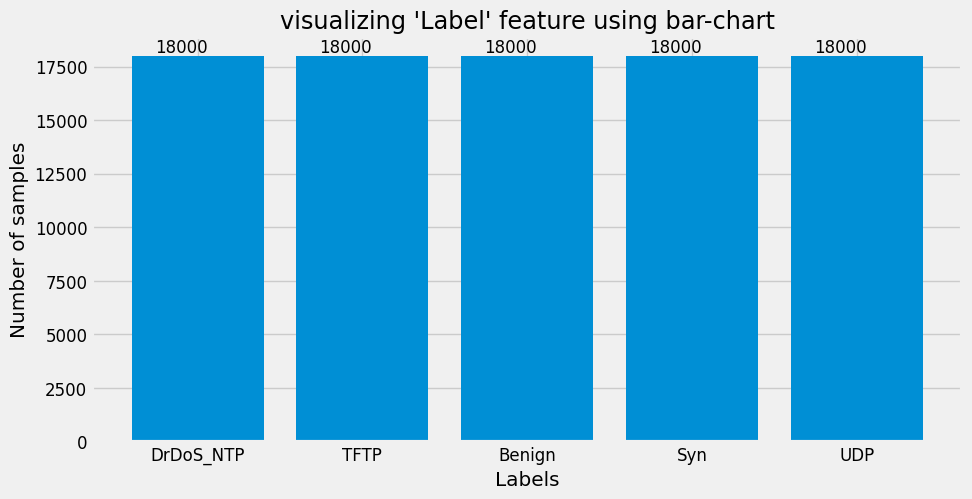

In [23]:
chart_df = dict(final_sampled_df['Label'].value_counts())
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(10,5))
    plt.rcParams['font.size'] = 12
    barchart_object = plt.bar(
        x=list(chart_df.keys()),
        height=list(chart_df.values())
    )
    plt.title(label="visualizing 'Label' feature using bar-chart")
    plt.xlabel(xlabel='Labels')
    plt.ylabel(ylabel='Number of samples')
    for bar, count in zip(barchart_object, list(chart_df.values())):
        plt.text(
            x=bar.get_x() + bar.get_width() / 2 - 0.1,
            y=bar.get_height() + 0.1,
            s=str(count),
            ha='center',
            va='bottom'
        )
    plt.show()

In [24]:
# Calculate the count of each unique value in the 'Label' column
label_counts = final_sampled_df['Label'].value_counts()

# Print the counts
print("Count of each unique value in the 'Label' column:")
print(label_counts)

Count of each unique value in the 'Label' column:
DrDoS_NTP    18000
TFTP         18000
Benign       18000
Syn          18000
UDP          18000
Name: Label, dtype: int64


In [25]:
final_sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Protocol                  90000 non-null  int8   
 1   Flow Duration             90000 non-null  int32  
 2   Total Fwd Packets         90000 non-null  int32  
 3   Total Backward Packets    90000 non-null  int16  
 4   Fwd Packets Length Total  90000 non-null  float32
 5   Bwd Packets Length Total  90000 non-null  float32
 6   Fwd Packet Length Max     90000 non-null  float32
 7   Fwd Packet Length Min     90000 non-null  float32
 8   Fwd Packet Length Mean    90000 non-null  float32
 9   Fwd Packet Length Std     90000 non-null  float32
 10  Bwd Packet Length Max     90000 non-null  float32
 11  Bwd Packet Length Min     90000 non-null  float32
 12  Bwd Packet Length Mean    90000 non-null  float32
 13  Bwd Packet Length Std     90000 non-null  float32
 14  Flow B

In [26]:
for feature in final_sampled_df.columns.tolist():
    print('{:<30} -> {} infinity values'.format(feature, final_sampled_df[feature].isin([np.inf, -np.inf]).sum()),'\n')

Protocol                       -> 0 infinity values 

Flow Duration                  -> 0 infinity values 

Total Fwd Packets              -> 0 infinity values 

Total Backward Packets         -> 0 infinity values 

Fwd Packets Length Total       -> 0 infinity values 

Bwd Packets Length Total       -> 0 infinity values 

Fwd Packet Length Max          -> 0 infinity values 

Fwd Packet Length Min          -> 0 infinity values 

Fwd Packet Length Mean         -> 0 infinity values 

Fwd Packet Length Std          -> 0 infinity values 

Bwd Packet Length Max          -> 0 infinity values 

Bwd Packet Length Min          -> 0 infinity values 

Bwd Packet Length Mean         -> 0 infinity values 

Bwd Packet Length Std          -> 0 infinity values 

Flow Bytes/s                   -> 0 infinity values 

Flow Packets/s                 -> 0 infinity values 

Flow IAT Mean                  -> 0 infinity values 

Flow IAT Std                   -> 0 infinity values 

Flow IAT Max                

---